In [683]:
%matplotlib inline

In [684]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from sklearn import preprocessing

plt.rcParams["figure.figsize"] = (12, 5)
sns.set_theme()

# Прелюдии

Датасет: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

In [685]:
df: pd.DataFrame = pd.read_csv('data/student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [687]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


В качестве целевой переменной возьму 5 классов - потребление алкоголя в рабочие дни от 1 до 5. Следовательно, от признака потребление алкоголя в выходные избавляюсь.

Эвристически отбираю значимые признаки для задачи.

In [688]:
data = df[[
    'Dalc',
    'sex', 'age', 'address', 'famsize', 'Pstatus',
    'Medu', 'Fedu', 'guardian', 'studytime', 'schoolsup',
    'famsup', 'paid', 'activities', 'nursery', 'higher',
    'internet', 'romantic', 'famrel', 'freetime', 'goout',
    'health', 'absences', 'G1', 'G2', 'G3'
]].copy()

Искусственно ухудшаем набор данных, чтобы затем его улучшить

In [689]:
rng = np.random.default_rng()


def rnd_idx():
    return rng.integers(data.shape[0], size=rng.integers(4, 9))

In [690]:
for col in ['age', 'address', 'famsize', 'studytime', 'paid', 'activities', 'romantic']:
    data.loc[rnd_idx(), col] = np.nan

In [691]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dalc        395 non-null    int64  
 1   sex         395 non-null    object 
 2   age         390 non-null    float64
 3   address     391 non-null    object 
 4   famsize     388 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   guardian    395 non-null    object 
 9   studytime   391 non-null    float64
 10  schoolsup   395 non-null    object 
 11  famsup      395 non-null    object 
 12  paid        389 non-null    object 
 13  activities  388 non-null    object 
 14  nursery     395 non-null    object 
 15  higher      395 non-null    object 
 16  internet    395 non-null    object 
 17  romantic    390 non-null    object 
 18  famrel      395 non-null    int64  
 19  freetime    395 non-null    i

# Основное задание

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students.

1. sex - student's sex (binary: 'F' - female or 'M' - male)
2. age - student's age (numeric: from 15 to 22)
3. address - student's home address type (binary: 'U' - urban or 'R' - rural)
4. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
5. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
6. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
7. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
11. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. schoolsup - extra educational support (binary: yes or no)
16. famsup - family educational support (binary: yes or no)
17. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
18. activities - extra-curricular activities (binary: yes or no)
19. nursery - attended nursery school (binary: yes or no)
20. higher - wants to take higher education (binary: yes or no)
21. internet - Internet access at home (binary: yes or no)
22. romantic - with a romantic relationship (binary: yes or no)
23. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
24. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
25. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
26. health - current health status (numeric: from 1 - very bad to 5 - very good)
27. absences - number of school absences (numeric: from 0 to 93)
28. G1 - first period grade (numeric: from 0 to 20)
29. G2 - second period grade (numeric: from 0 to 20)
30. G3 - final grade (numeric: from 0 to 20, output target)

Целевая переменная - Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

In [692]:
data.head()

,Dalc,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,studytime,...,internet,romantic,famrel,freetime,goout,health,absences,G1,G2,G3
0,1,F,18.0,U,GT3,A,4,4,mother,2.0,...,no,no,4,3,4,3,6,5,6,6
1,1,F,17.0,U,GT3,T,1,1,father,2.0,...,yes,no,5,3,3,3,4,5,5,6
2,2,F,15.0,U,LE3,T,1,1,mother,2.0,...,yes,no,4,3,2,3,10,7,8,10
3,1,F,15.0,U,GT3,T,4,2,mother,3.0,...,yes,yes,3,2,2,5,2,15,14,15
4,1,F,16.0,U,GT3,T,3,3,father,2.0,...,no,no,4,3,2,5,4,6,10,10


## Описательный анализ набора данных

In [693]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dalc        395 non-null    int64  
 1   sex         395 non-null    object 
 2   age         390 non-null    float64
 3   address     391 non-null    object 
 4   famsize     388 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   guardian    395 non-null    object 
 9   studytime   391 non-null    float64
 10  schoolsup   395 non-null    object 
 11  famsup      395 non-null    object 
 12  paid        389 non-null    object 
 13  activities  388 non-null    object 
 14  nursery     395 non-null    object 
 15  higher      395 non-null    object 
 16  internet    395 non-null    object 
 17  romantic    390 non-null    object 
 18  famrel      395 non-null    int64  
 19  freetime    395 non-null    i

In [694]:
data.describe()

,Dalc,age,Medu,Fedu,studytime,famrel,freetime,goout,health,absences,G1,G2,G3
count,395.000000,390.000000,395.000000,395.000000,391.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1.481013,16.694872,2.749367,2.521519,2.038363,3.944304,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.890741,1.277338,1.094735,1.088201,0.841891,0.896659,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,1.000000,16.000000,2.000000,2.000000,1.000000,4.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,1.000000,17.000000,3.000000,2.000000,2.000000,4.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,2.000000,18.000000,4.000000,3.000000,2.000000,5.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,5.000000,22.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Попробую самостоятельно найти шкалу измерения каждого из признаков

In [695]:
def get_scale(s: pd.Series):
    if s.dtype == object:  # если тип колонки object и она может содержать nan -> привожу nan к str
        s = s.astype(str)
    scale = s.unique()
    scale.sort()
    if is_numeric_dtype(scale) and len(scale) > 6:  # для непрерывных шкал нахожу min и max
        min_ = pd.Series(scale).dropna().min()
        max_ = pd.Series(scale).dropna().max()
        return (min_, max_), scale

    return scale


data.apply(get_scale)

Dalc                                            [1, 2, 3, 4, 5]
sex                                                      [F, M]
age           ((15.0, 22.0), [15.0, 16.0, 17.0, 18.0, 19.0, ...
address                                             [R, U, nan]
famsize                                         [GT3, LE3, nan]
Pstatus                                                  [A, T]
Medu                                            [0, 1, 2, 3, 4]
Fedu                                            [0, 1, 2, 3, 4]
guardian                                [father, mother, other]
studytime                             [1.0, 2.0, 3.0, 4.0, nan]
schoolsup                                             [no, yes]
famsup                                                [no, yes]
paid                                             [nan, no, yes]
activities                                       [nan, no, yes]
nursery                                               [no, yes]
higher                                  

Шкалы наглядно видны. Например, для поля `absences` это положительные целые числа не превышающее 100, а для `romantic` - yes, no и пропущенные значения.

Пропуски и их количество

In [696]:
na_stat = data.isna().sum()
na_stat[na_stat != 0]

age           5
address       4
famsize       7
studytime     4
paid          6
activities    7
romantic      5
dtype: int64

Распределения данных. Наиболее близки к нормальному распределению - `freetime`, `goout`, `G1`, `G2`, `G3`

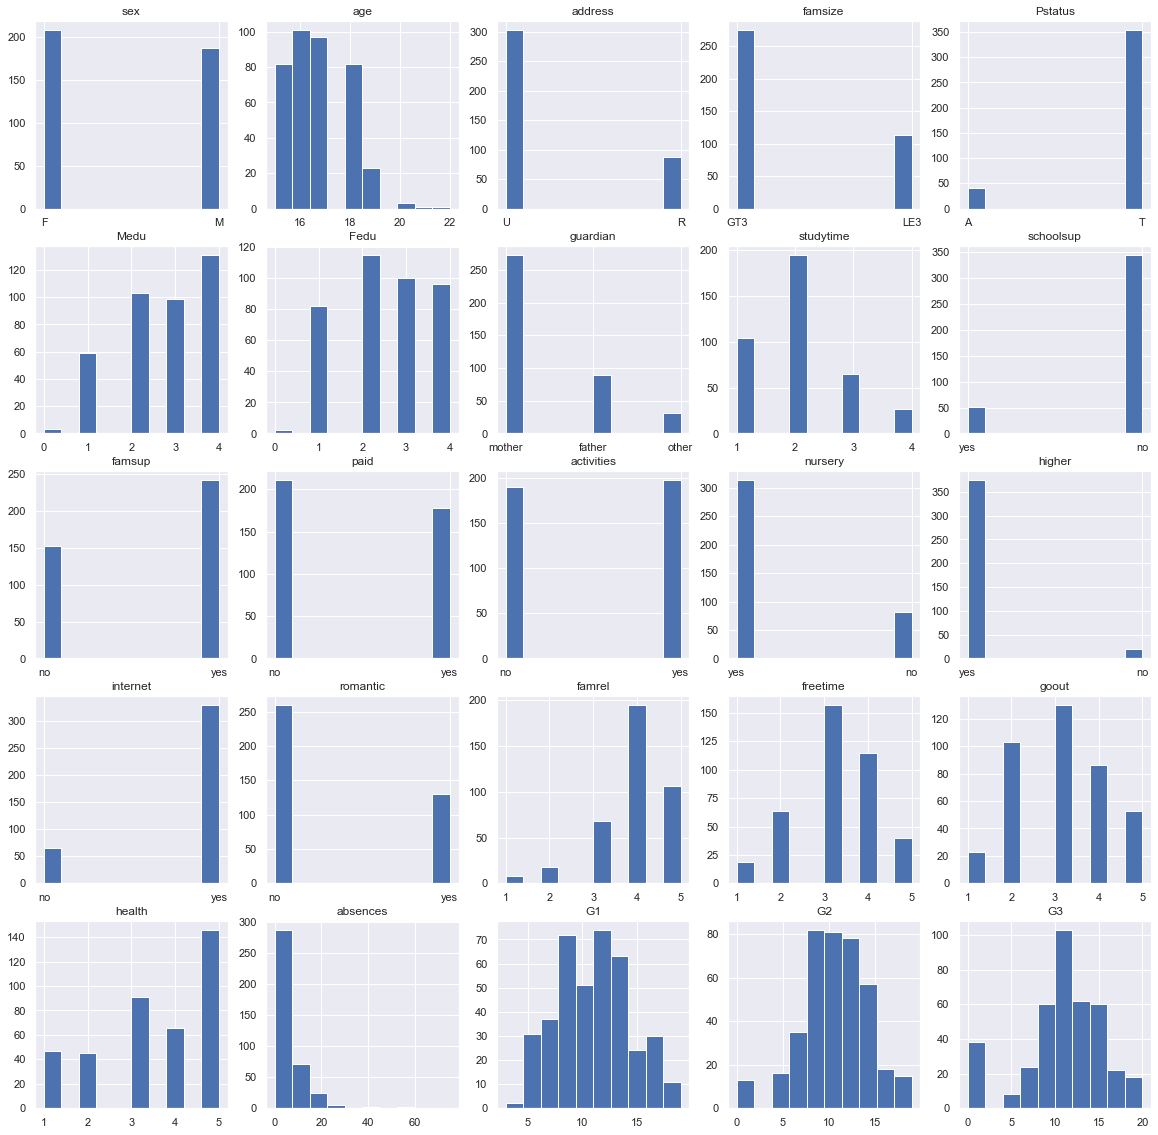

In [697]:
N = 5
fig, axs = plt.subplots(N, N, figsize=(20, 20))
for i in range(N):
    for j in range(N):
        col = data.columns[i * N + j + 1]
        ax = axs[i][j]
        data[col].hist(ax=ax)
        ax.set_title(col)

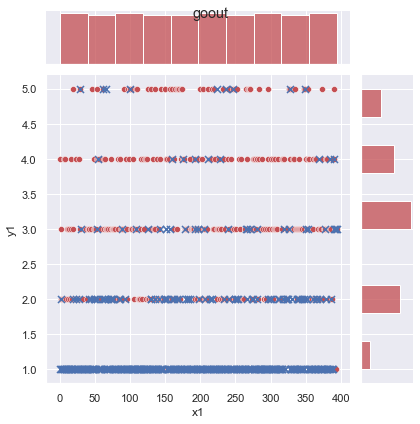

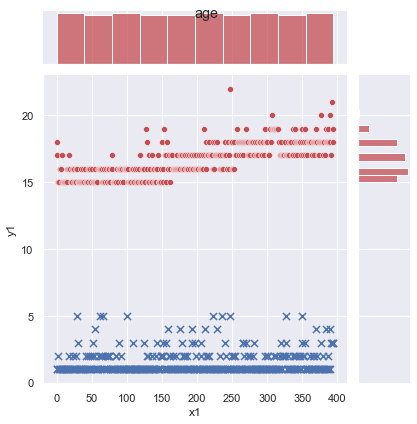

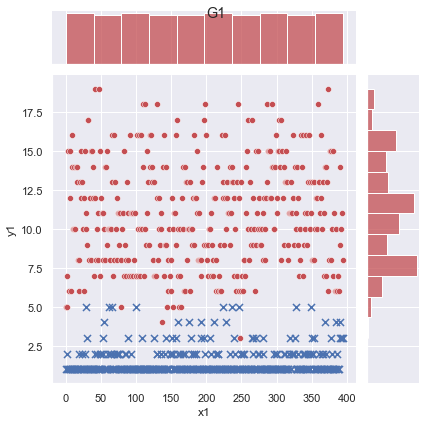

In [698]:
# совместное распределение признаков с целевой переменной
d_alc = pd.DataFrame(df['Dalc'].reset_index().to_numpy(), columns=['x2', 'y2'])

for i, col in enumerate(['goout', 'age', 'G1']):
    feature = pd.DataFrame(df[col].reset_index().to_numpy(), columns=['x1', 'y1'])
    graph = sns.jointplot(x=feature.x1, y=feature.y1, color='r')
    graph.x = d_alc.x2
    graph.y = d_alc.y2
    graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
    graph.fig.suptitle(col)

Все категориальные признаки показывают не самую лучшую корреляцию с целевой переменной. Но положительным моментом является то, что все признаки слабо коррелируют между собой

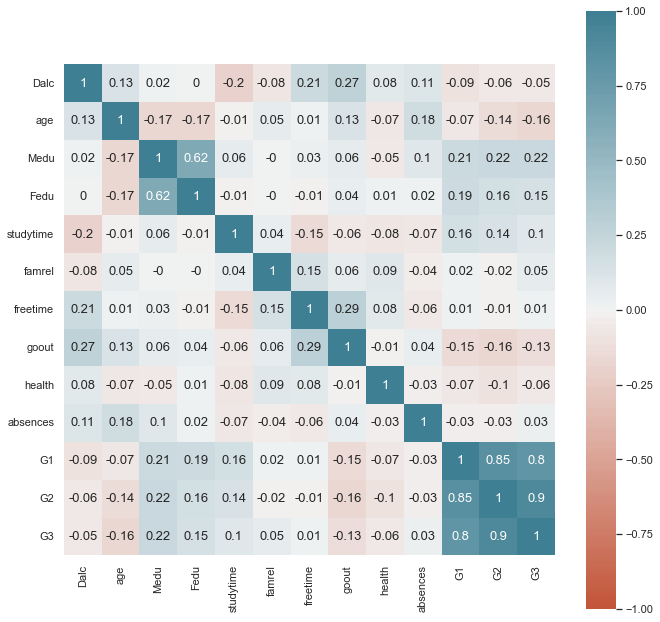

In [699]:
ax = sns.heatmap(
    data.corr().round(2),
    annot=True,
    annot_kws={'size': 13},
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.figure.set_size_inches(11, 11)

## Предобработка данных

### Исправление пропусков

In [700]:
na_stat = data.isna().sum()
na_cols = na_stat[na_stat != 0].index
data[na_cols].sample(10)

,age,address,famsize,studytime,paid,activities,romantic
288,18.0,U,GT3,3.0,yes,yes,no
341,18.0,U,GT3,2.0,no,yes,no
313,19.0,U,LE3,2.0,yes,no,yes
121,15.0,U,GT3,4.0,yes,yes,no
279,18.0,U,LE3,1.0,yes,yes,no
218,17.0,U,GT3,1.0,yes,no,no
132,17.0,U,LE3,1.0,no,no,yes
270,19.0,U,GT3,2.0,yes,yes,no
366,18.0,U,LE3,3.0,yes,no,yes
66,15.0,U,GT3,4.0,no,yes,yes


In [701]:
tidy: pd.DataFrame = data.copy()

In [702]:
# для возраста возьмем медианное

tidy['age'].fillna(tidy['age'].median(), inplace=True)

In [703]:
# остальные данные являются категориальными, поэтому восстановим их с помощью моды

for col in na_cols.drop('age'):
    tidy[col].fillna(tidy[col].mode()[0], inplace=True)

In [704]:
na_stat = tidy.isna().sum()
na_stat[na_stat != 0]

Series([], dtype: int64)

### Работа с категориальными и бинарными данными

In [705]:
tidy.head()

,Dalc,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,studytime,...,internet,romantic,famrel,freetime,goout,health,absences,G1,G2,G3
0,1,F,18.0,U,GT3,A,4,4,mother,2.0,...,no,no,4,3,4,3,6,5,6,6
1,1,F,17.0,U,GT3,T,1,1,father,2.0,...,yes,no,5,3,3,3,4,5,5,6
2,2,F,15.0,U,LE3,T,1,1,mother,2.0,...,yes,no,4,3,2,3,10,7,8,10
3,1,F,15.0,U,GT3,T,4,2,mother,3.0,...,yes,yes,3,2,2,5,2,15,14,15
4,1,F,16.0,U,GT3,T,3,3,father,2.0,...,no,no,4,3,2,5,4,6,10,10


In [706]:
# кодировка бинарных и иерархических (порядковых, последовательных) данных

cols = [
    'Dalc',
    'sex', 'address', 'famsize', 'Pstatus', 'studytime', 'schoolsup',
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
    'romantic', 'famrel', 'freetime', 'goout', 'health'
]
le = preprocessing.LabelEncoder()
tidy[cols] = tidy[cols].apply(le.fit_transform)

In [707]:
# остальные категориальные данные

cols = ['guardian']

lb = preprocessing.OneHotEncoder()
for col in cols:
    arr = lb.fit_transform(tidy[['guardian']]).toarray()
    new_features = pd.DataFrame(arr, columns=[f'guardian_{i}' for i in range(arr.shape[1])])
    tidy = tidy.drop(columns=[col])
    tidy = pd.concat([tidy, new_features], axis=1)

In [708]:
tidy.head()

,Dalc,sex,age,address,famsize,Pstatus,Medu,Fedu,studytime,schoolsup,...,freetime,goout,health,absences,G1,G2,G3,guardian_0,guardian_1,guardian_2
0,0,0,18.0,1,0,0,4,4,1,1,...,2,3,2,6,5,6,6,0.0,1.0,0.0
1,0,0,17.0,1,0,1,1,1,1,0,...,2,2,2,4,5,5,6,1.0,0.0,0.0
2,1,0,15.0,1,1,1,1,1,1,1,...,2,1,2,10,7,8,10,0.0,1.0,0.0
3,0,0,15.0,1,0,1,4,2,2,0,...,1,1,4,2,15,14,15,0.0,1.0,0.0
4,0,0,16.0,1,0,1,3,3,1,0,...,2,1,4,4,6,10,10,1.0,0.0,0.0


## Конечный датасет

In [709]:
tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dalc        395 non-null    int64  
 1   sex         395 non-null    int32  
 2   age         395 non-null    float64
 3   address     395 non-null    int32  
 4   famsize     395 non-null    int32  
 5   Pstatus     395 non-null    int32  
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   studytime   395 non-null    int64  
 9   schoolsup   395 non-null    int32  
 10  famsup      395 non-null    int32  
 11  paid        395 non-null    int32  
 12  activities  395 non-null    int32  
 13  nursery     395 non-null    int32  
 14  higher      395 non-null    int32  
 15  internet    395 non-null    int32  
 16  romantic    395 non-null    int32  
 17  famrel      395 non-null    int64  
 18  freetime    395 non-null    int64  
 19  goout       395 non-null    i

In [710]:
tidy.describe()

,Dalc,sex,age,address,famsize,Pstatus,Medu,Fedu,studytime,schoolsup,...,freetime,goout,health,absences,G1,G2,G3,guardian_0,guardian_1,guardian_2
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.481013,0.473418,16.698734,0.777215,0.286076,0.896203,2.749367,2.521519,1.037975,0.129114,...,2.235443,2.108861,2.554430,5.708861,10.908861,10.713924,10.415190,0.227848,0.691139,0.081013
std,0.890741,0.499926,1.269667,0.416643,0.452498,0.305384,1.094735,1.088201,0.837616,0.335751,...,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443,0.419976,0.462610,0.273201
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,0.000000,8.000000,9.000000,8.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,0.000000,...,2.000000,2.000000,3.000000,4.000000,11.000000,11.000000,11.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,0.000000,...,3.000000,3.000000,4.000000,8.000000,13.000000,13.000000,14.000000,0.000000,1.000000,0.000000
max,4.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.000000,1.000000,...,4.000000,4.000000,4.000000,75.000000,19.000000,19.000000,20.000000,1.000000,1.000000,1.000000


## Задача классификации

In [711]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [712]:
X, y = tidy[tidy.columns[1:]], tidy[tidy.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [713]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

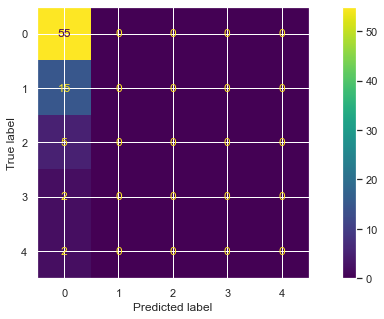

In [714]:
_ = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [715]:
print(metrics.classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        55
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2

    accuracy                           0.70        79
   macro avg       0.14      0.20      0.16        79
weighted avg       0.48      0.70      0.57        79



Такие неутешительные результаты классификации объясняются неравномерностью распределения классов в наборе данных.

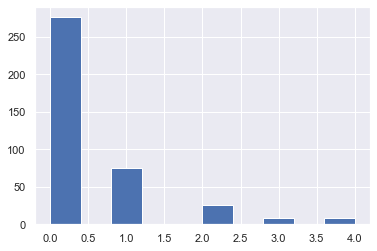

In [716]:
_ = y.hist(figsize=(6, 4))

Попытки нормализовать распределение путем уменьшения данных не дают улучшения результата

In [717]:
y_ = pd.concat([y[~y.isin([0, 1])], y[y == 1].sample(50), y[y == 0].sample(50)]).sort_index()
X_ = X.loc[y_.index]
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, stratify=y_)

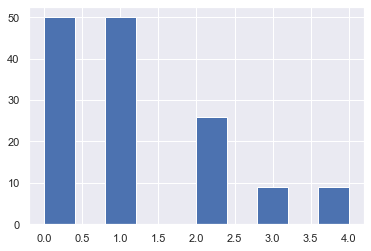

In [718]:
_ = y_.hist(figsize=(6, 4))

In [719]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

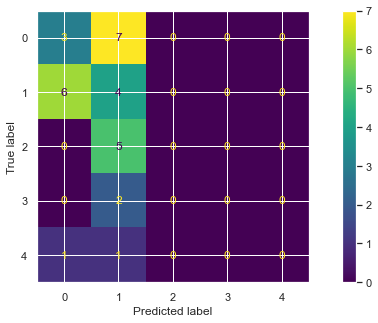

In [720]:
_ = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [721]:
print(metrics.classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.30      0.30      0.30        10
           1       0.21      0.40      0.28        10
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2

    accuracy                           0.24        29
   macro avg       0.10      0.14      0.12        29
weighted avg       0.18      0.24      0.20        29



In [722]:
y_ = pd.concat([y[y == 0].sample(80), y[y == 1]]).sort_index()
X_ = X.loc[y_.index]
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, stratify=y_)

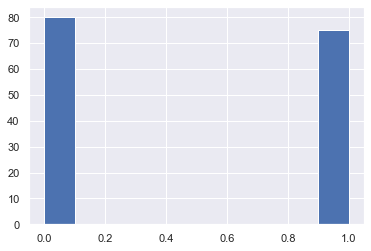

In [723]:
_ = y_.hist(figsize=(6, 4))

In [724]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

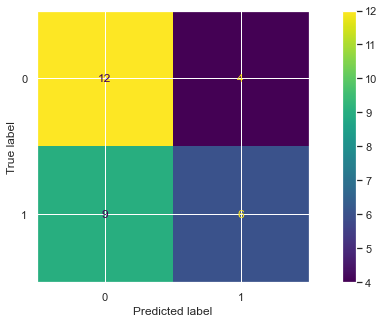

In [725]:
_ = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [726]:
print(metrics.classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.57      0.75      0.65        16
           1       0.60      0.40      0.48        15

    accuracy                           0.58        31
   macro avg       0.59      0.57      0.56        31
weighted avg       0.59      0.58      0.57        31



In [727]:
y_ = pd.concat([y[y == 0].sample(80), y[y == 1]]).sort_index()
X_ = X.loc[y_.index][['freetime', 'health', 'G1', 'G2', 'G3']]
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, stratify=y_)

In [728]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

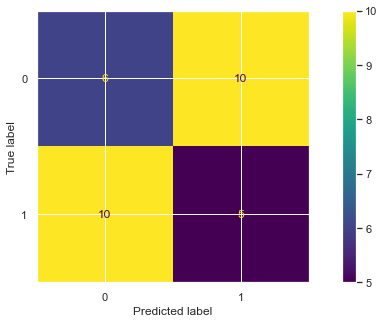

In [729]:
_ = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [730]:
print(metrics.classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.38      0.38      0.38        16
           1       0.33      0.33      0.33        15

    accuracy                           0.35        31
   macro avg       0.35      0.35      0.35        31
weighted avg       0.35      0.35      0.35        31



In [731]:
print(f'Best score: {clf.score(X_test, y_test)}')

Best score: 0.3548387096774194
